# Import libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 0)
pd.options.display.float_format = '{:.2f}'.format
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt

# Import dataset

In [2]:
fires = pd.read_csv("csv_files/data.csv", names = ["Date", "Acres Burned", "Number of Fires", "Acres Burned per Fire"])
fires.head()

,Date,Acres Burned,Number of Fires,Acres Burned per Fire
0,U.S. Wildfires Year-to-Date,NaN,NaN,NaN
1,Date,Acres Burned,Number of Fires,Acres Burned per Fire
2,200001,40757,2796,14.58
3,200002,208967,8467,24.68
4,200003,549866,18779,29.28


# Clean Data

In [3]:
fires.columns

Index(['Date', 'Acres Burned', 'Number of Fires', 'Acres Burned per Fire'], dtype='object')

In [4]:
# drop first 2 rows as they are unneeded
fires.drop([fires.index[0], fires.index[1]], inplace = True)
fires.head()

,Date,Acres Burned,Number of Fires,Acres Burned per Fire
2,200001,40757,2796,14.58
3,200002,208967,8467,24.68
4,200003,549866,18779,29.28
5,200004,732579,28015,26.15
6,200005,1027072,39865,25.76


In [5]:
# identify data
fires.dtypes

Date                     object
Acres Burned             object
Number of Fires          object
Acres Burned per Fire    object
dtype: object

In [6]:
# Fix Data Types

# Date
fires["Date"] = pd.to_datetime(fires["Date"], errors = "coerce", format = "%Y%m")

# Acres burned
fires["Acres Burned"]= pd.to_numeric(fires["Acres Burned"])

# Number of fires
fires["Number of Fires"] = pd.to_numeric(fires["Number of Fires"])

# Acres Burned per Fire
fires["Acres Burned per Fire"]= pd.to_numeric(fires["Acres Burned per Fire"])

fires.dtypes

Date                     datetime64[ns]
Acres Burned                      int64
Number of Fires                   int64
Acres Burned per Fire           float64
dtype: object

In [7]:
# Reindex data
fires.reset_index(drop = True, inplace = True)
fires.head()

,Date,Acres Burned,Number of Fires,Acres Burned per Fire
0,2000-01-01,40757,2796,14.58
1,2000-02-01,208967,8467,24.68
2,2000-03-01,549866,18779,29.28
3,2000-04-01,732579,28015,26.15
4,2000-05-01,1027072,39865,25.76


In [8]:
# Create a column for the year each fire occured
fires["Year of Fire"] = fires["Date"].dt.year.astype("string")
fires.dtypes

Date                     datetime64[ns]
Acres Burned                      int64
Number of Fires                   int64
Acres Burned per Fire           float64
Year of Fire                     string
dtype: object

In [9]:
# Remove fires["Date"]
fires.drop(columns = "Date", inplace=True)

In [10]:
# Missing value check
fires.isnull().sum()

Acres Burned             0
Number of Fires          0
Acres Burned per Fire    0
Year of Fire             0
dtype: int64

In [11]:
# Duplicate check
fires.duplicated().sum()

0

In [12]:
profile = ProfileReport(fires, title= "EDA of fires dataset", explorative= True)

In [13]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

# Descriptive Analysis (Univariate Analysis)

In [14]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Acres Burned           269 non-null    int64  
 1   Number of Fires        269 non-null    int64  
 2   Acres Burned per Fire  269 non-null    float64
 3   Year of Fire           269 non-null    string 
dtypes: float64(1), int64(2), string(1)
memory usage: 8.5 KB


# Descriptive Analysis: Year of Fire

In [15]:
# Check how many unique values there are
fires["Year of Fire"].nunique()


23

In [16]:
# Check how much each value occurs
fires["Year of Fire"].value_counts()

2000    12
2001    12
2002    12
2003    12
2004    12
2005    12
2006    12
2007    12
2008    12
2009    12
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    12
2018    12
2019    12
2020    12
2021    12
2022     5
Name: Year of Fire, dtype: Int64

# Descriptive Analysis: Acres Burned

In [17]:
# Descriptive statistics
pd.to_numeric(fires["Acres Burned"].describe())

count        269.00
mean     3306598.11
std      3154807.68
min         3131.00
25%       330447.00
50%      2367271.00
75%      5708150.00
max     10274679.00
Name: Acres Burned, dtype: float64

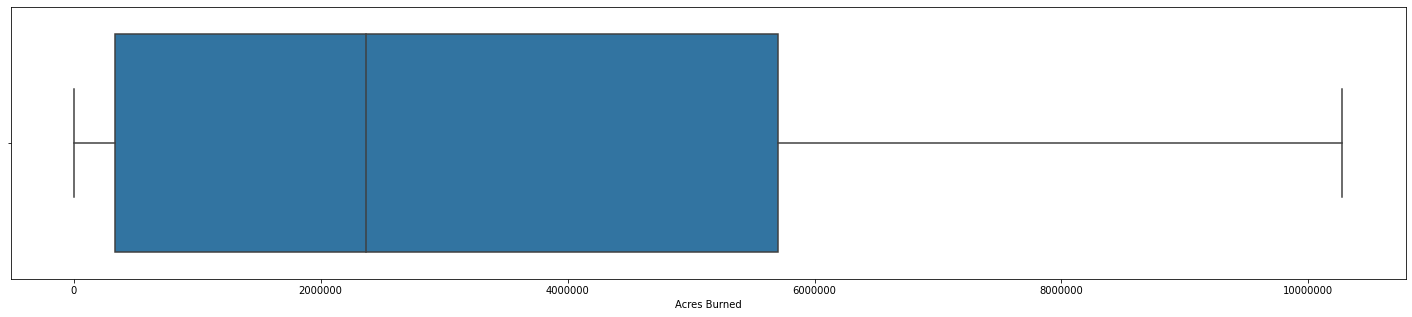

In [18]:
# Quantile statistics
fig, ax = plt.subplots(figsize=(25,5))
sns.boxplot(data = fires, x = fires["Acres Burned"])
plt.ticklabel_format(style='plain', axis='x')

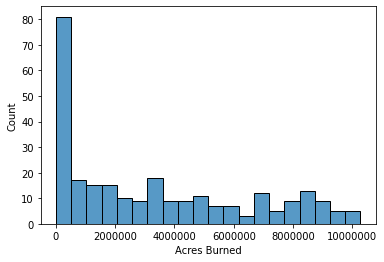

In [19]:
sns.histplot(data = fires, x = "Acres Burned", bins = 20)
plt.ticklabel_format(style='plain', axis='x')

# Descriptive Analysis: Number of Fires

In [20]:
pd.to_numeric(fires["Number of Fires"].describe())

count     269.00
mean    36565.66
std     24715.27
min       387.00
25%     14781.00
50%     36656.00
75%     55533.00
max     96385.00
Name: Number of Fires, dtype: float64

<AxesSubplot:xlabel='Number of Fires'>

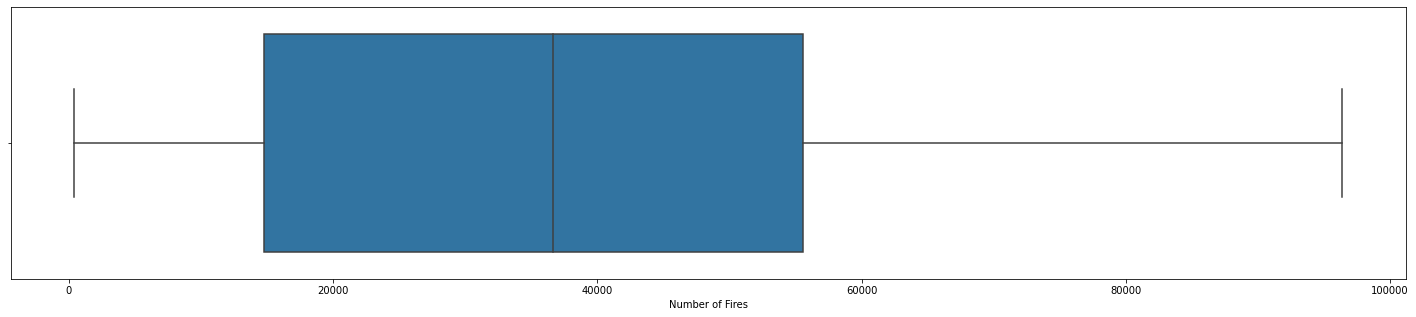

In [21]:
fig, ax = plt.subplots(figsize =(25, 5))
sns.boxplot(data = fires, x = fires["Number of Fires"])

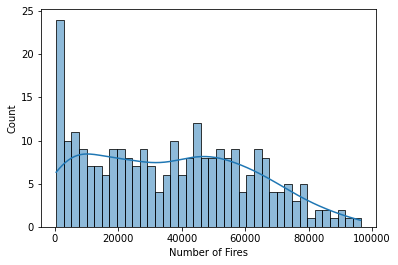

In [22]:
sns.histplot(data = fires, x = "Number of Fires", bins = 40, kde = True)
plt.ticklabel_format(style='plain', axis='x')

# Descriptive Analysis: Acres Burned per Fire

In [23]:
pd.to_numeric(fires["Acres Burned per Fire"].describe())

count   269.00
mean     70.04
std      49.08
min       5.82
25%      22.35
50%      64.40
75%     104.10
max     187.19
Name: Acres Burned per Fire, dtype: float64

<AxesSubplot:xlabel='Acres Burned per Fire'>

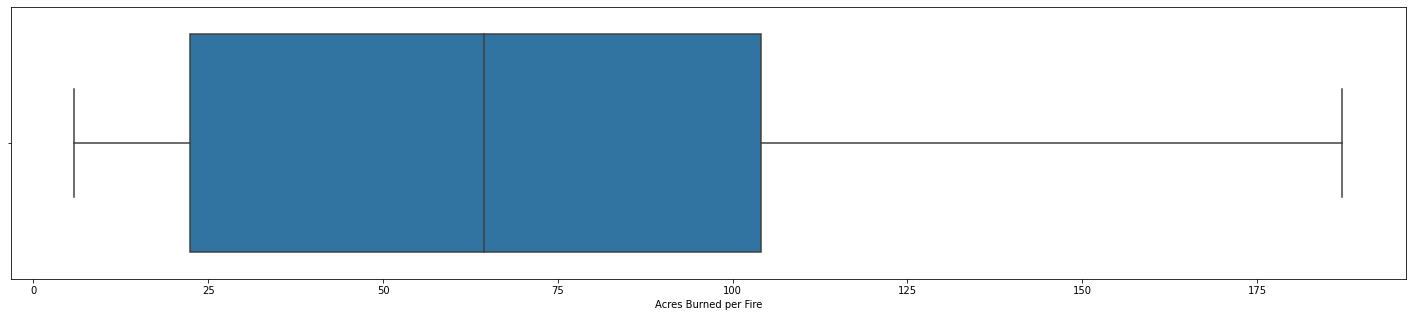

In [24]:
fig, ax = plt.subplots(figsize =(25, 5))
sns.boxplot(data = fires, x = fires["Acres Burned per Fire"])

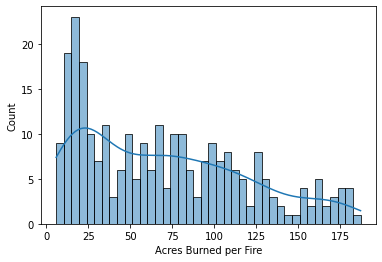

In [25]:
sns.histplot(data = fires, x = "Acres Burned per Fire", bins = 40, kde = True)
plt.ticklabel_format(style='plain', axis='x')

# Correlation Analysis (Bivariate Analysis)

<AxesSubplot:xlabel='Number of Fires', ylabel='Year of Fire'>

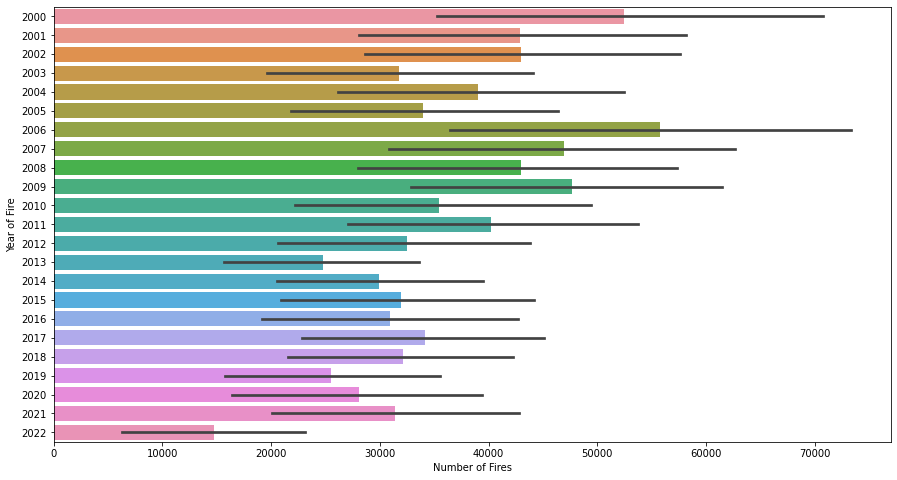

In [26]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.barplot(x = "Number of Fires", y = "Year of Fire", data = fires)

<AxesSubplot:xlabel='Acres Burned', ylabel='Acres Burned per Fire'>

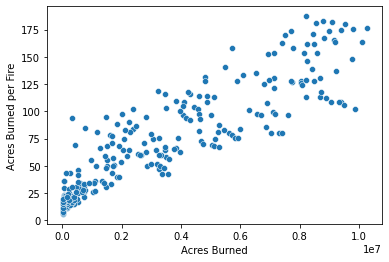

In [27]:
sns.scatterplot(data = fires, x = "Acres Burned", y = "Acres Burned per Fire")

# Find Column Totals By Year

In [28]:
# Add totals to a list
fires_totals = fires["Number of Fires"].groupby(fires["Year of Fire"]).agg('sum')
acres_totals = fires["Acres Burned"].groupby(fires["Year of Fire"]).agg('sum')
acres_per_fire_totals = fires["Acres Burned per Fire"].groupby(fires["Year of Fire"]).agg('sum')
# Add List to dataframe
#fires_totals
#acres_totals
#acres_per_fire_totals

In [29]:
fires.to_excel("fires_data.xlsx")